TEAM ID:-PNT2022-TMID43750

Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils
from tensorflow.keras.models import load_model

Loading the Data

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Analyzing the data

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

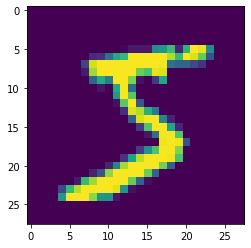

In [6]:
plt.imshow(X_train[0])

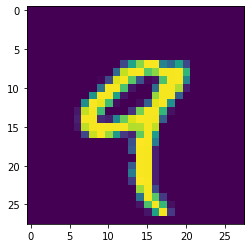

In [11]:
plt.imshow(X_train[4])

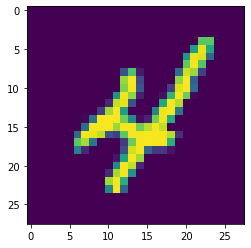

In [12]:
plt.imshow(X_train[9])

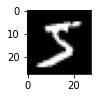

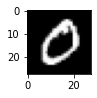

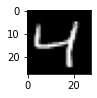

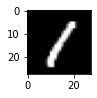

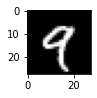

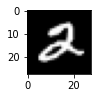

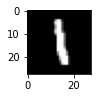

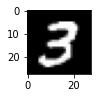

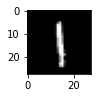

In [13]:
for i in range(9):
    plt.subplot(330 + 1 +i)
    plt.imshow(X_train[i], cmap = plt.get_cmap('gray'))
    plt.show()

Reshaping the data

In [35]:
X_train = X_train.reshape(60000,28,28,1).astype('float32')
X_test = X_test.reshape(10000,28,28,1).astype('float32')

In [14]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [34]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Applying One Hot Encoding

In [15]:
number_of_classes = 20

In [16]:
y_train = np_utils.to_categorical(y_train,number_of_classes)
y_test = np_utils.to_categorical(y_test,number_of_classes)

In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [18]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

model creation

In [21]:
model = Sequential()

Add CNN layer

In [22]:
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(number_of_classes,activation="softmax"))

In [23]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 20)                92180     
                                                                 
Total params: 111,284
Trainable params: 111,284
Non-trainable params: 0
__________________________________________________

Model compilation

In [24]:
model.compile(loss="categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

Train the model

In [26]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 199s 106ms/step - loss: 0.1084 - accuracy: 0.9680 - val_loss: 0.0688 - val_accuracy: 0.9789
Epoch 2/10
1875/1875 [==============================] - 192s 103ms/step - loss: 0.0608 - accuracy: 0.9813 - val_loss: 0.0592 - val_accuracy: 0.9817
Epoch 3/10
1875/1875 [==============================] - 193s 103ms/step - loss: 0.0488 - accuracy: 0.9848 - val_loss: 0.0646 - val_accuracy: 0.9802
Epoch 4/10
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0373 - accuracy: 0.9883 - val_loss: 0.0560 - val_accuracy: 0.9836
Epoch 5/10
1875/1875 [==============================] - 194s 104ms/step - loss: 0.0311 - accuracy: 0.9903 - val_loss: 0.0830 - val_accuracy: 0.9794
Epoch 6/10
1875/1875 [==============================] - 192s 102ms/step - loss: 0.0276 - accuracy: 0.9913 - val_loss: 0.0822 - val_accuracy: 0.9839
Epoch 7/10
1875/1875 [==============================] - 192s 103ms/step - loss: 0.0223 - accuracy: 0.9933 - val_

Observing the metrics

In [27]:
metrics=model.evaluate(X_test,y_test,verbose=0)
print("Metrics(Test Loss & Test Accuracy):")
print(metrics)

Metrics(Test Loss & Test Accuracy):
[0.1032245010137558, 0.9833999872207642]


Test The Model

In [28]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 138ms/step
[[9.6682393e-12 2.3878869e-19 4.7532766e-11 1.3000407e-08 4.0062739e-18
  1.0541278e-18 3.2797596e-24 1.0000000e+00 1.1390209e-11 6.6800986e-13
  8.0081485e-15 3.9902498e-15 8.4138763e-16 1.2739406e-15 8.9601125e-16
  7.7580179e-19 4.6918251e-16 4.5425335e-15 3.4090355e-14 7.7868823e-15]
 [1.0793404e-17 8.9298473e-12 1.0000000e+00 7.1126603e-14 5.7539737e-20
  1.4092132e-25 1.4710295e-13 8.5469277e-24 9.7925537e-18 4.8750973e-24
  1.3591919e-19 1.4914541e-19 1.3554484e-19 8.9434598e-21 6.8939866e-21
  9.7833639e-19 1.1631595e-19 8.7871753e-24 6.0275365e-20 3.4402348e-20]
 [6.2589552e-11 9.9999833e-01 2.6507017e-09 7.7299902e-14 2.6934868e-09
  2.2275413e-10 4.1190772e-14 9.1817685e-07 7.0200616e-07 1.7723028e-14
  1.5599947e-13 5.3134314e-13 4.0410275e-13 1.6377753e-13 3.0052366e-13
  6.7847297e-16 5.2625374e-13 1.8785408e-15 1.5183694e-19 3.6042697e-13]
 [9.9999976e-01 3.6237660e-22 9.9260311e-10 3.7890647e-14 5.2541096e-17
  2.0839

In [29]:
print(np.argmax(prediction,axis = 1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Observing The Metrics

In [30]:
metrics=model.evaluate(X_test,y_test,verbose=1)
print("Metrics(Test Loss & Test Accuracy):")
print(metrics)

313/313 [==============================] - 7s 23ms/step - loss: 0.1032 - accuracy: 0.9834
Metrics(Test Loss & Test Accuracy):
[0.1032245010137558, 0.9833999872207642]


Test The Model

In [31]:
prediction = model.predict(X_test[1:5])
print(prediction)

1/1 [==============================] - 0s 21ms/step
[[1.0793404e-17 8.9298473e-12 1.0000000e+00 7.1126603e-14 5.7539737e-20
  1.4092132e-25 1.4710295e-13 8.5469277e-24 9.7925537e-18 4.8750973e-24
  1.3591919e-19 1.4914541e-19 1.3554484e-19 8.9434598e-21 6.8939866e-21
  9.7833639e-19 1.1631595e-19 8.7871753e-24 6.0275365e-20 3.4402348e-20]
 [6.2589552e-11 9.9999833e-01 2.6507017e-09 7.7299902e-14 2.6934868e-09
  2.2275413e-10 4.1190772e-14 9.1817685e-07 7.0200616e-07 1.7723028e-14
  1.5599947e-13 5.3134314e-13 4.0410275e-13 1.6377753e-13 3.0052366e-13
  6.7847297e-16 5.2625374e-13 1.8785408e-15 1.5183694e-19 3.6042697e-13]
 [9.9999976e-01 3.6237660e-22 9.9260311e-10 3.7890647e-14 5.2541096e-17
  2.0839638e-15 1.8405345e-07 1.1958019e-16 2.0019872e-13 4.8594695e-10
  7.7773399e-18 2.8318708e-18 3.2685277e-18 7.0489801e-18 1.0362302e-18
  1.4392231e-18 1.0270770e-17 3.7186752e-19 1.9830856e-15 1.8044742e-18]
 [1.6965663e-15 2.9949916e-14 6.2316217e-13 1.6431334e-11 1.0000000e+00
  2.46574

In [32]:
print(np.argmax(prediction,axis = 1))
print(y_test[1:5])

[2 1 0 4]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Save The Model

In [33]:
model.save("MNIST.h5")